_Importing Required Libraries_

In [1]:
from importlib import reload
import pinn
reload(pinn)

<module 'pinn' from 'd:\\Prisha\\SEM 6\\Van-der-Pol-informed-Neural-Networks\\pinn.py'>

In [2]:
pip install hampel

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\pdfstructure-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
import tensorflow as tf
from hampel import hampel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from matplotlib import pyplot
from numpy import array
import matplotlib.pyplot as plt

### generating vanderpol oscillator data (position and velocity) using range kutta method

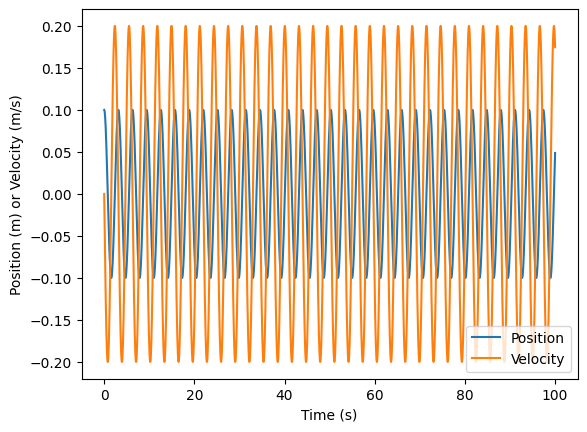

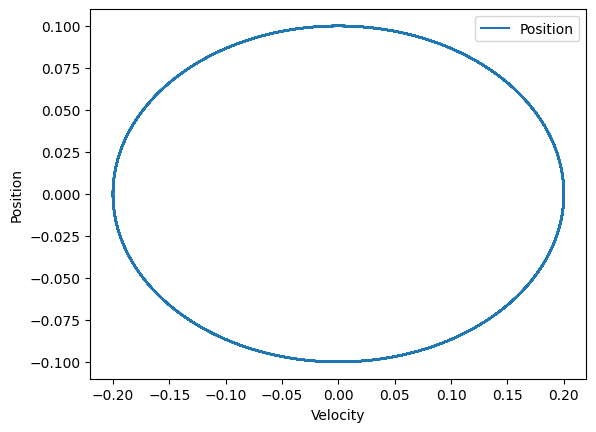

In [8]:
from data_gen.data_gen.shm import shm

# Example usage
mass = 1.0  # kg
spring_constant = 4.0  # N/m
initial_position = 0.1  # m
initial_velocity = 0.0  # m/s
time_step = 0.01  # s
num_steps = 10000

time, position, velocity = shm(mass, spring_constant, initial_position, initial_velocity, time_step, num_steps)

import matplotlib.pyplot as plt

plt.plot(time, position, label="Position")
plt.plot(time, velocity, label="Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Position (m) or Velocity (m/s)")
plt.legend()
plt.show()

plt.plot(velocity, position, label="Position")
plt.xlabel("Velocity")
plt.ylabel("Position")
plt.legend()
plt.show()


In [10]:
t_start = 0  # Starting time
t_end = 70  # End time
t = []
dt = 0.04  # Time step 
t.append(t_start)
for i in range(int((t_end - t_start) / dt)):
  t.append(t[-1] + dt)
 

with open(r'.\Dataset\shm_data.dat', "wb") as file:
  for i in range(len(t)):
    # Convert velocity and position to bytes before writing
    velocity_bytes = str(velocity[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(position[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)


## Pretraining

The `van_der_pol_intermittency.dat` feeds the model with the dynamics of the Van der Pol Oscillator

In [12]:
data2= np.genfromtxt(r'.\Dataset\shm_data.dat')
training_set2 = pd.DataFrame(data2).reset_index(drop=True)
training_set2 = training_set2.iloc[:,1]

_Calculating the value of_ $\frac{dx}{dt}$, _and_ $\frac{d^2x}{dt^2}$

In [13]:
vpn = pinn.PINN(4,training_set2)
print("training set size",training_set2.shape)
print("gradient_t shape",vpn.gradient_t.shape)
print("gradient_tt shape",vpn.gradient_tt.shape)

training set size (1751,)
gradient_t shape (1750,)
gradient_tt shape (1749,)


## Loading Datasets

_दिल्ली WIND SPEED_

In [14]:
vpn.load_data("./Dataset/delhi.csv",3)
print(vpn.training_set.shape)

(1452,)


In [15]:
vpn.convert(offset=30,in_val=35,out_val=10)
print("shape of trainX",vpn.trainX.shape)
print("shape of trainY",vpn.trainy.shape)
print("shape of forecastX",vpn.forecastX.shape)

shape of trainX (1407, 1, 37)
shape of trainY (1407, 30)
shape of forecastX (1, 1, 37)


In [16]:
vpn.train_model(type="SHM")

SHM


Epoch 1/100

18/18 [==============================] - 4s 43ms/step - loss: 57.3353 - val_loss: 57.1684
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 52.1452 - val_loss: 53.8677
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 49.6438 - val_loss: 51.7706
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 47.8690 - val_loss: 49.7728
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 46.2965 - val_loss: 48.0434
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 44.6411 - val_loss: 45.8353
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 42.8008 - val_loss: 43.8064
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 41.0082 - val_loss: 42.1265
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 39.6650 - val_loss: 40.7188
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 38.4250 

In [17]:
vpn.evaluate_model()

1/1 [==============================] - 1s 591ms/step


8.674145498705887

In [18]:
final_forecast = vpn.final_forecast
print(final_forecast)
print(final_forecast.shape)


[[2.2517753  0.41247764 0.         0.38510698 0.5418752  0.
  0.         0.         0.         0.        ]]
(1, 10)


In [19]:
true_forecast = vpn.true_forecast
print(true_forecast)
print(true_forecast.shape)

[[ 3.43        8.02777778  9.87916667  3.91666667  6.73157895  6.42083333
  10.41428571 15.92666667 19.4047619   6.18095238]]
(1, 10)


In [20]:
error = vpn.evaluate_model()
print(error)

1/1 [==============================] - 0s 31ms/step
8.674145498705887


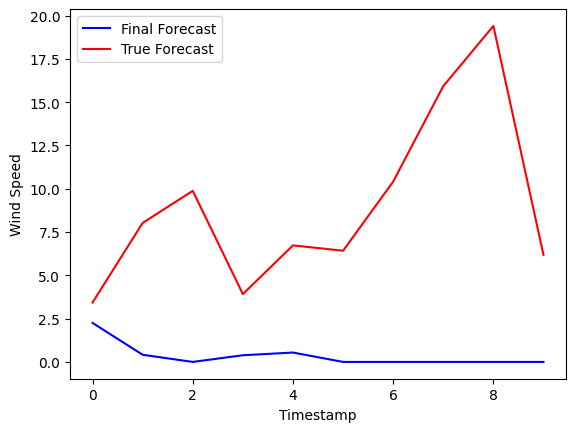

In [21]:
vpn.plot_forecasts(final_forecast=final_forecast,true_forecast=true_forecast)